In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
N = 101
dx = 0.01
dt = 0.005


In [15]:
def u_0(x):
    return m.exp(-100*(x-0.5)**2)

def next_u(str):
    return str[0] + dt * str[1] + 0.5 * str[2] * dt**2

def next_a(str_x0,str_x1,str_x2):
    return (str_x2[0] + str_x0[0] - 2 * str_x1[0]) / (dx**2)

def next_v(str_t0,str_t1):
    return str_t0[1] + 0.5 * dt * (str_t1[2] + str_t0[2])

In [53]:
range_x = np.arange(0,1.01,dx)
range_t = np.arange(0,5.005,dt)
time = len(range_t)
struna = np.zeros([time,N,3])            #tablica o wymiarach N x 3 gdzie na miejscu 0 osadzono x

for i in range(1,N-1):
    struna[0][i][0] = u_0(range_x[i])

struna[0][N-1][0] = 0
struna[0][N-1][1] = 0
struna[0][N-1][2] = 0
struna[0][0][0] = 0
struna[0][0][1] = 0
struna[0][0][2] = 0


for t in range(1,time):
    for i in range(1,N-1):
        struna[t][i][0] = next_u(struna[t-1][i])
        struna[t][i][2] = next_a(struna[t-1][i-1], struna[t-1][i], struna[t-1][i+1])
        struna[t][i][1] = next_v(struna[t-1][i], struna[t][i])
    # struna[t][N-1][0] = 0
    # struna[t][N-1][1] = 0
    # struna[t][N-1][2] = 0
    # struna[t][0][0] = 0
    # struna[t][0][1] = 0
    # struna[t][0][2] = 0

Text(0.5, 0.98, 'Warunki sztywne, u(x,t) dla t = 0, 0.1, 0.15, 0.2')

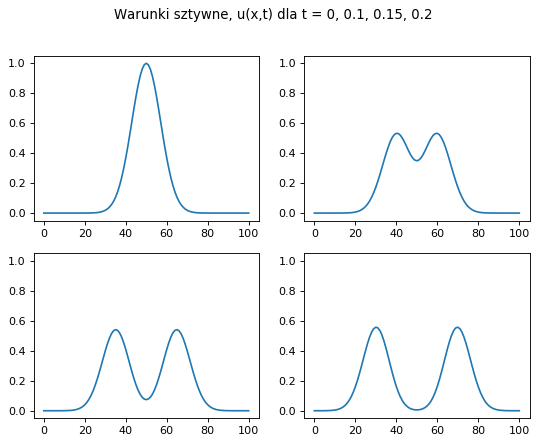

In [54]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,2,1)
plt.plot(struna.T[0].T[0])
plt.ylim(-0.05,1.05)
plt.subplot(2,2,2)
plt.plot(struna.T[0].T[20])
plt.ylim(-0.05,1.05)
plt.subplot(2,2,3)
plt.plot(struna.T[0].T[30])
plt.ylim(-0.05,1.05)
plt.subplot(2,2,4)
plt.plot(struna.T[0].T[40])
plt.ylim(-0.05,1.05)
fig.suptitle('Warunki sztywne, u(x,t) dla t = 0, 0.1, 0.15, 0.2')

 ...]

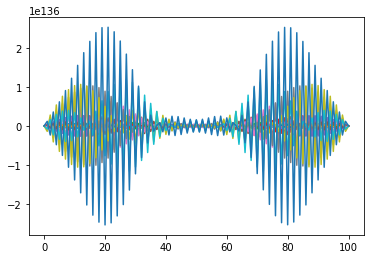

In [55]:
plt.plot(struna.T[0])